In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
np.abs

<ufunc 'absolute'>

In [2]:
data = pd.read_csv('pca_2d_data.csv')
data.head()

,f1,f2
0,2.038772,1.102760
1,0.869536,0.238030
2,1.795888,1.020364
3,0.103510,-0.513661
4,1.479554,0.750702


<AxesSubplot:xlabel='f1', ylabel='f2'>

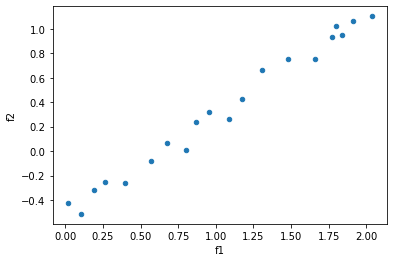

In [49]:
data.plot(x='f1', y='f2', kind='scatter')

### from scratch

[2.09718701 0.00807615]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


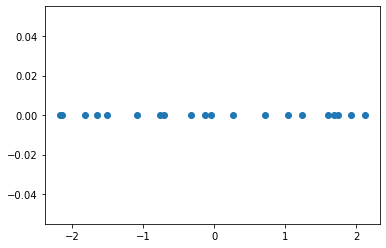

In [12]:
## Implement PCA!!
# Step 1: Column standardization
x_data = data['f1'].values
y_data = data['f2'].values

mean_x = np.mean(x_data)
mean_y = np.mean(y_data)

std_x = np.std(x_data)
std_y = np.std(y_data)

x_data_cs = (x_data - mean_x) / std_x
y_data_cs = (y_data - mean_y) / std_y

X_st = np.zeros((len(x_data), 2))
X_st[:, 0] = x_data_cs
X_st[:, 1] = y_data_cs

# Step 2: Eigenvalue decomposition
cov_X_st = np.matmul(X_st.T, X_st) / (len(x_data)-1)
eigenvalues, eigenvectors = np.linalg.eig(cov_X_st)

print(eigenvalues)
print(eigenvectors)

# Step 3: Reduce the dimension! Choose the eigenvector corresponding to the largest eigenvalue
X_prime = eigenvectors[:, 0].dot(X_st.T)
X_prime_reduced = X_prime

# Step 4: Visualize
plt.figure()
plt.scatter(X_prime_reduced, np.zeros((len(x_data),)))
plt.show()

### Using sklearn for help

[2.09718701 0.00807615]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


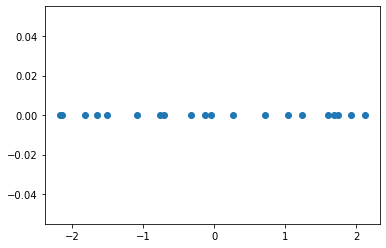

In [13]:
from sklearn.preprocessing import StandardScaler
data_sc = StandardScaler().fit_transform(data)
cov = np.cov(data_sc.T)
eigenvalues, eigenvectors = np.linalg.eig(cov)
print(eigenvalues)
print(eigenvectors)

X_prime_reduced = eigenvectors[:, 0].dot(data_sc.T)

# Step 4: Visualize
plt.figure()
plt.scatter(X_prime_reduced, np.zeros((len(data_sc),)))
plt.show()

### Sklearn PCA

[2.09718701 0.00807615]
[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]


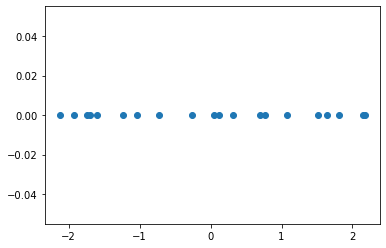

In [14]:
from sklearn import decomposition
from sklearn import datasets

pca = decomposition.PCA(n_components=2)

X_p = pca.fit_transform(data_sc)
print(pca.explained_variance_)
print(pca.components_)

plt.figure()
plt.scatter(X_p[::-1, 0], np.zeros((len(data_sc),)))
plt.show()

In [7]:
pca.components_

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
pca=PCA()

In [19]:
data=np.random.randint(low=10,high=100,size=(100,6))
data

array([[25, 90, 91, 82, 61, 74],
       [49, 83, 40, 66, 31, 37],
       [66, 34, 96, 27, 71, 60],
       [13, 53, 90, 12, 78, 36],
       [26, 24, 35, 36, 75, 50],
       [92, 20, 91, 42, 58, 80],
       [21, 79, 67, 91, 29, 79],
       [46, 72, 88, 16, 89, 18],
       [80, 18, 63, 34, 51, 90],
       [92, 74, 98, 51, 51, 47],
       [40, 37, 39, 81, 31, 81],
       [61, 82, 99, 24, 68, 19],
       [60, 43, 28, 50, 36, 89],
       [77, 51, 27, 88, 39, 93],
       [38, 60, 72, 38, 86, 55],
       [44, 95, 76, 96, 81, 20],
       [73, 50, 48, 88, 64, 88],
       [19, 27, 32, 25, 61, 59],
       [66, 34, 21, 68, 53, 65],
       [24, 29, 33, 81, 47, 65],
       [20, 90, 65, 15, 25, 45],
       [86, 15, 33, 67, 92, 61],
       [35, 56, 20, 85, 21, 94],
       [53, 55, 98, 82, 71, 94],
       [35, 68, 97, 48, 34, 88],
       [42, 35, 20, 56, 86, 88],
       [97, 39, 85, 58, 96, 67],
       [56, 94, 81, 24, 19, 30],
       [50, 84, 20, 77, 16, 27],
       [69, 49, 68, 17, 79, 54],
       [73

In [47]:
from sklearn import decomposition
from sklearn import datasets

data_sc = StandardScaler().fit_transform(data)
pca = decomposition.PCA(n_components=6)

X_p = pca.fit_transform(data_sc)
print(pca.explained_variance_)
print(pca.components_)

# plt.figure()
# plt.scatter(X_p[::-1, 0], np.zeros((len(data_sc),)))
# plt.show()

[2.29203498 1.62972374 1.21933751 0.74687852 0.56482287 0.21386904]
[[ 0.51331562  0.61812976  0.47382538 -0.10570301 -0.06827641 -0.33775344]
 [ 0.06412757  0.13277429 -0.08783709 -0.64539312 -0.526902    0.52572358]
 [ 0.51652406  0.22515319 -0.5615369  -0.00493205  0.52357659  0.30500569]
 [-0.31936627 -0.01427902  0.18236522 -0.68662242  0.60537042 -0.16315798]
 [-0.24587817  0.27822636  0.49205947  0.30646241  0.25882962  0.67756882]
 [-0.55058763  0.68700715 -0.42079789  0.08307052 -0.1005686  -0.17546742]]


In [12]:
np.mean(data,axis=0)

array([49.4, 55.2, 59.4, 47.2, 64.4, 59.1])

In [13]:
data

array([[88, 68, 73, 38, 48, 70],
       [17, 24, 24, 97, 82, 45],
       [38, 57, 85, 78, 69, 79],
       [77, 81, 98, 45, 22, 22],
       [13, 50, 29, 18, 23, 93],
       [61, 55, 34, 21, 97, 82],
       [79, 90, 60, 56, 99, 53],
       [25, 32, 62, 39, 45, 81],
       [10, 47, 94, 32, 89, 23],
       [86, 48, 35, 48, 70, 43]])

In [16]:
data-np.mean(data,axis=0)

array([[ 38.6,  12.8,  13.6,  -9.2, -16.4,  10.9],
       [-32.4, -31.2, -35.4,  49.8,  17.6, -14.1],
       [-11.4,   1.8,  25.6,  30.8,   4.6,  19.9],
       [ 27.6,  25.8,  38.6,  -2.2, -42.4, -37.1],
       [-36.4,  -5.2, -30.4, -29.2, -41.4,  33.9],
       [ 11.6,  -0.2, -25.4, -26.2,  32.6,  22.9],
       [ 29.6,  34.8,   0.6,   8.8,  34.6,  -6.1],
       [-24.4, -23.2,   2.6,  -8.2, -19.4,  21.9],
       [-39.4,  -8.2,  34.6, -15.2,  24.6, -36.1],
       [ 36.6,  -7.2, -24.4,   0.8,   5.6, -16.1]])

In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_transformed=scaler.fit_transform(data)

In [21]:
np.cov(data_transformed.T)

array([[ 1.01010101e+00, -3.09990820e-02, -1.02791800e-01,
        -8.91802079e-02, -1.44873834e-01, -4.47069992e-02],
       [-3.09990820e-02,  1.01010101e+00,  3.16478600e-03,
        -1.99738195e-03, -1.18498787e-03, -1.74565141e-01],
       [-1.02791800e-01,  3.16478600e-03,  1.01010101e+00,
        -1.18671928e-04,  2.27094714e-01,  1.66460525e-02],
       [-8.91802079e-02, -1.99738195e-03, -1.18671928e-04,
         1.01010101e+00, -1.65397301e-01,  2.10804728e-01],
       [-1.44873834e-01, -1.18498787e-03,  2.27094714e-01,
        -1.65397301e-01,  1.01010101e+00, -1.05091356e-02],
       [-4.47069992e-02, -1.74565141e-01,  1.66460525e-02,
         2.10804728e-01, -1.05091356e-02,  1.01010101e+00]])

In [22]:
np.linalg.eig(np.cov(data_transformed.T))

(array([1.35861226, 1.2988483 , 1.07248351, 0.67187904, 0.87933028,
        0.77945267]),
 array([[-0.27741931,  0.4258559 ,  0.42871527, -0.2457173 , -0.66762772,
          0.22756257],
        [ 0.17900172,  0.31433024, -0.73458416,  0.17018152, -0.24025188,
          0.49280653],
        [ 0.48164688, -0.34751349,  0.00183958,  0.29013928, -0.65325706,
         -0.36921767],
        [-0.41134777, -0.44783574, -0.45171211, -0.58725229, -0.24075935,
         -0.15284636],
        [ 0.63279387, -0.2100777 ,  0.19061134, -0.57454808,  0.08241076,
          0.42686012],
        [-0.29896173, -0.59530508,  0.19028776,  0.38924248, -0.07106948,
          0.60287954]]))

In [16]:
pca.components_

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

In [ ]:
np.dot()

In [23]:
data_transformed.shape

(100, 6)

In [24]:
np.linalg.eig(np.cov(data_transformed.T))[1]

array([[-0.27741931,  0.4258559 ,  0.42871527, -0.2457173 , -0.66762772,
         0.22756257],
       [ 0.17900172,  0.31433024, -0.73458416,  0.17018152, -0.24025188,
         0.49280653],
       [ 0.48164688, -0.34751349,  0.00183958,  0.29013928, -0.65325706,
        -0.36921767],
       [-0.41134777, -0.44783574, -0.45171211, -0.58725229, -0.24075935,
        -0.15284636],
       [ 0.63279387, -0.2100777 ,  0.19061134, -0.57454808,  0.08241076,
         0.42686012],
       [-0.29896173, -0.59530508,  0.19028776,  0.38924248, -0.07106948,
         0.60287954]])

In [25]:
np.dot(data_transformed,np.linalg.eig(np.cov(data_transformed.T)))

<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


ValueError: could not broadcast input array from shape (6,6) into shape (6,)

In [33]:
print(data_transformed.shape,np.linalg.eig(np.cov(data_transformed.T))[1].shape)

(100, 6) (6, 6)


In [35]:
np.dot(data_transformed,np.linalg.eig(np.cov(data_transformed.T))[1])

array([[ 7.40884318e-01, -1.54820666e+00, -1.82040781e+00,
         4.34868624e-01, -8.01289551e-01,  2.97548839e-01],
       [-5.68822009e-01,  8.16932733e-01, -1.45085335e+00,
         7.65228778e-02,  3.67624521e-02, -2.06470439e-01],
       [ 1.26021879e+00, -4.45663315e-01,  1.38175106e+00,
         4.93949569e-01, -9.04594072e-01, -3.26679105e-01],
       [ 2.55143468e+00, -2.67321120e-01,  7.31317560e-02,
         8.71440835e-01,  6.80261972e-01, -7.13147682e-01],
       [ 6.00427298e-01, -3.92459016e-01,  7.93520134e-01,
        -2.94504713e-01,  1.69590052e+00, -2.49641531e-01],
       [-5.45682978e-03, -7.27171908e-01,  2.01615813e+00,
         3.66692576e-01, -1.56660116e+00, -1.29221648e-01],
       [-7.31580113e-01, -1.43676911e+00, -1.93274754e+00,
         7.48693733e-01, -2.04285495e-01, -9.45812011e-02],
       [ 2.71453629e+00,  8.04164525e-01, -3.44577950e-02,
         4.27190291e-02, -2.64266176e-01, -2.85837046e-01],
       [-5.65506475e-01, -6.26452972e-01,  2.026

In [37]:
pca = decomposition.PCA(n_components=6)
X_p = pca.fit_transform(data_transformed)
X_p

array([[ 7.40884318e-01, -1.54820666e+00,  1.82040781e+00,
         8.01289551e-01, -2.97548839e-01,  4.34868624e-01],
       [-5.68822009e-01,  8.16932733e-01,  1.45085335e+00,
        -3.67624521e-02,  2.06470439e-01,  7.65228778e-02],
       [ 1.26021879e+00, -4.45663315e-01, -1.38175106e+00,
         9.04594072e-01,  3.26679105e-01,  4.93949569e-01],
       [ 2.55143468e+00, -2.67321120e-01, -7.31317560e-02,
        -6.80261972e-01,  7.13147682e-01,  8.71440835e-01],
       [ 6.00427298e-01, -3.92459016e-01, -7.93520134e-01,
        -1.69590052e+00,  2.49641531e-01, -2.94504713e-01],
       [-5.45682978e-03, -7.27171908e-01, -2.01615813e+00,
         1.56660116e+00,  1.29221648e-01,  3.66692576e-01],
       [-7.31580113e-01, -1.43676911e+00,  1.93274754e+00,
         2.04285495e-01,  9.45812011e-02,  7.48693733e-01],
       [ 2.71453629e+00,  8.04164525e-01,  3.44577950e-02,
         2.64266176e-01,  2.85837046e-01,  4.27190291e-02],
       [-5.65506475e-01, -6.26452972e-01, -2.026

In [20]:
import numpy as np

points = np.random.rand(100,2)
centroids = np.random.rand(3,2)

#function returns the manhattan distance between points p1 and p2
def calc_dist(p1, p2):
    
    dist = np.sum(np.abs(p1-p2))
    return dist
    
#function returns the updated centroid for the points in lst which represent a cluster
def update_centroid(lst):
    lst=np.array(lst)
    x=np.mean(lst[:,0])
    y=np.mean(lst[:,1])
    return [x,y]
    
#function performs one iteration of k-means
def k_means(points, centroids):
    # clusters[i] stores all the points with label i
    clusters = [[] for i in range(len(centroids))]
    
    for pnt in points:
        #tmp[i] stores the distance of pnt from centroid[i]
        tmp = []
        for i,centroid in enumerate(centroids):
            tmp.append(calc_dist(centroid,pnt))   #calculate the distance between point and centroid
        
        cluster_id = np.argmin(tmp)  #index of the centroid from which pnt is closest
        print(tmp)
        print(cluster_id)
        clusters[cluster_id].append(pnt)
        
    
    #update the centroid of each cluster
    new_centroid = []
    for cluster in clusters:
        new_centroid.append(update_centroid(cluster)) #update the centroid of cluster
    
    return new_centroid

for i in range(5):
    centroids = k_means(points,centroids)  #perform ith iteration on data to update clusters
    print(np.round(centroids,2))
    
    
    

[0.08128743728330834, 1.2406277000739412, 0.7452687761663394]
0
[0.4489619018215698, 0.7993977417037212, 0.9346299410953222]
0
[0.691879704368363, 0.5564799391569281, 1.1811718235164688]
1
[0.377010910367943, 1.1339564576337877, 1.2035671238175907]
0
[0.6657577262172255, 0.5826019173080655, 0.6202130935523884]
1
[0.1091274135940693, 1.1885871516849353, 0.935683627043717]
0
[0.6092024773500602, 1.240132316988478, 1.435758690799708]
0
[0.47206404379155675, 0.9068583047031854, 1.2986202572412044]
0
[0.07659549470405347, 1.1717641488212376, 0.8469412243409152]
0
[0.7483132716012303, 1.083705180702494, 1.574869485050878]
0
[0.4403049896652783, 1.343391572173469, 0.47803764803455895]
0
[0.6893455153490002, 0.5590141281762908, 0.6225311421002812]
1
[0.4776351822015983, 1.7259948257268893, 0.8764823027445588]
0
[0.2110963010733139, 1.4594559445986048, 0.9879310047028336]
0
[0.6170963582916825, 0.8799738313676165, 0.20945985515796517]
2
[0.3113766894238389, 0.9388491239343534, 0.515179524025808

In [4]:
arr=np.array([(1,2),(4,5),(7,8)])
arr

array([[1, 2],
       [4, 5],
       [7, 8]])

In [7]:
np.mean(arr,axis=0)

array([4., 5.])

In [11]:
np.argmax(arr[:,0])

2

array([[0.96894314, 0.02234383],
       [0.53192875, 0.3273164 ],
       [0.17680061, 0.28181194],
       [0.08798914, 0.50026652],
       [0.29494178, 0.40915211],
       [0.15414134, 0.37371103],
       [0.24564528, 0.14114439],
       [0.85362638, 0.31101112],
       [0.57648372, 0.52568864],
       [0.56786158, 0.08236058],
       [0.58073922, 0.36254465],
       [0.83724375, 0.54948217],
       [0.92701729, 0.4654344 ],
       [0.5982042 , 0.16640481],
       [0.43697705, 0.49503611],
       [0.27025317, 0.67529027],
       [0.13823407, 0.71176077],
       [0.50037293, 0.9711925 ],
       [0.12179258, 0.52614595],
       [0.24607174, 0.13204407],
       [0.07708211, 0.64045808],
       [0.75830084, 0.75374705],
       [0.25202492, 0.68875642],
       [0.67555946, 0.96145105],
       [0.82966104, 0.59798051],
       [0.66308782, 0.84957186],
       [0.75734809, 0.12613828],
       [0.6735488 , 0.12337959],
       [0.39519393, 0.37050282],
       [0.02148195, 0.72169714],
       [0.

In [67]:
similarity=np.array([1,7,19,8,9,45,12,6,34,2])
similarity

array([ 1,  7, 19,  8,  9, 45, 12,  6, 34,  2])

In [71]:
df=pd.DataFrame(data=similarity,columns=['data'])
df.sort_values(by='data',ascending=False).index[:5].tolist()

[5, 8, 2, 6, 4]

In [72]:
df

,data
0,1
1,7
2,19
3,8
4,9
5,45
6,12
7,6
8,34
9,2
